<div style="border:solid Chocolate 2px; padding: 40px">

<b>Борис, привет!</b>

Меня зовут Евгений Головин, я буду ревьюером твоего проекта. Если ты не против, то предлагаю построить наше общение на "ты" ;) Если удобнее на "вы", то нет проблем, только скажи об этом. 

В ходе работы я оставил тебе комментарии <font color='green'>зеленого</font>, <font color='gold'>желтого</font> и <font color='red'>красного</font> цветов. Сейчас объясню, что они значат:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Решение на этом шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Решение на этом шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 Решение на этом шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы :)
    
<div class="alert alert-info">
<b>А свой помечай вот так, чтобы я его не потерял ;)</b> 
</div>
    
На мои комменатрии можно и нужно реагировать, только делать это стоит так, чтобы твои и мои комменты не смешались: выделяй свои цветами, сильно отличающимися от моих.
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Супер, что есть небольшое введение. Только давай доработаем и добавим план работы и описание данных? 

### Откройте файл с данными и изучите общую информацию. 

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

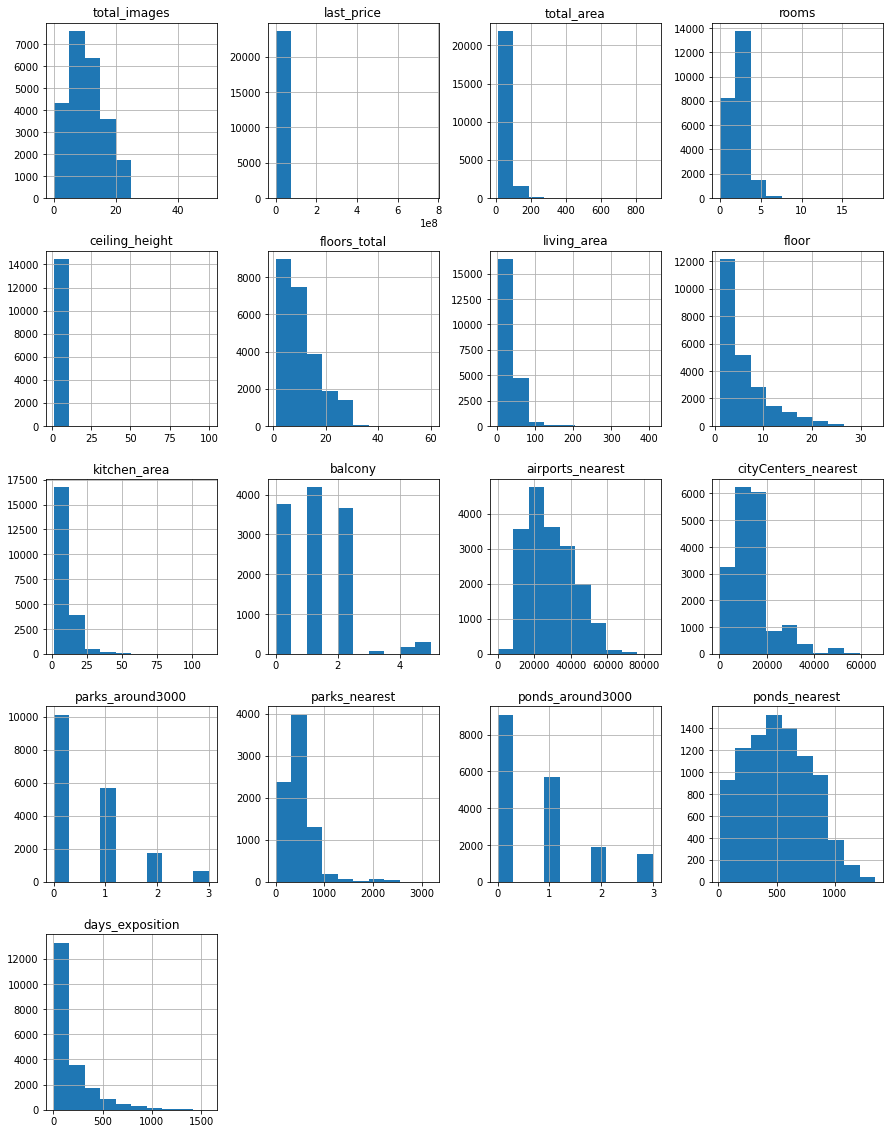

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
data = pd.read_csv('/datasets/real_estate_data.csv',sep = '\t')

data.hist(figsize=(15, 20))
data.info

data['total_images'].value_counts()
data['rooms'].value_counts()
data['floor'].value_counts()
data['is_apartment'].value_counts()
data['ceiling_height'].value_counts()
data['total_area'].value_counts()
data['airports_nearest'].value_counts()
data['cityCenters_nearest'].value_counts()
data['parks_around3000'].value_counts()
data['parks_nearest'].value_counts()
data['ponds_around3000'].value_counts()

first_day_exposition - object - должен быть тип datetime
floors_total - должен быть тип int, т.к. количество этажей - целое значение + нулевые значения
is_apartment - должен быть тип bool + нулевые значения
parks_around3000 - тип должен быть int + нулевые значения
ponds_around3000 - тип должен быть int + нулевые значения
days_exposition - тип должен быть int + нулевые значения

Заменим пропуски, там где это возможн - следующий шаг, дублиакты убираем через один шаг

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошо) 

### Предобработка данных

In [3]:


ceiling_height_avg = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(value = ceiling_height_avg)
floors_total_avg = data['floors_total'].median()
data['floors_total'] = data['floors_total'].fillna(value = floors_total_avg).round()

data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

print('Количество NaN по kitchen_area:', data['kitchen_area'].isnull().sum())
print('Количество NaN по living_area:', data['living_area'].isnull().sum())

data['balcony'] = data['balcony'].fillna(0).astype('int')
data['last_price'] = data['last_price'].astype('int')
data[data['floors_total'].isna()]


data['is_apartment'] = data['is_apartment'].fillna(False)
#True уже есть, пропуски заменим на False


data['locality_name'].value_counts()
#точно не трогаем, пропуски непонятны

data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['locality_name'] = data['locality_name'].str.replace('ё', 'е').replace(['поселок городского типа', 'городской поселок'], 'поселок городского типа', regex=True)
data



                            













Количество NaN по kitchen_area: 2278
Количество NaN по living_area: 1903


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,0
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,8.50,0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,NaN,0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,0
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602


1)пользотватели оставляют пропуски часто по не знаю что писать, например если нет парка у дома, люди отсавлюят пустое значение, нам нужен 0 вместо пустых, также и с балконами 2)я хотел поменять только булев тип данных, но не смог найти как, это нужно для того чтобы логичиски проверять является ли квартира студией или является ли квартира апаретаментами 


2)Например в площади отдельных помещений и всей квартиры, не имеет смысал искать пропуски6 поскольку мы не сможем посчитать пропущенную площадь и медиана будет не объективна



3)явные дубликаты логчино связаны с "е" и "ё", их мы заменилил, также сделали замену "городской поселок" и "поселок городского типа, ну и Мурино и Кудрово привели в порядок

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Все замечания учтены!

### Посчитайте и добавьте в таблицу новые столбцы

In [4]:

metr_cost = data['last_price']/data['total_area']
data.insert(3, 'metr2_cost', metr_cost, allow_duplicates = True)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


data['year'] = data['first_day_exposition'].apply(lambda x: x.year)
data['month'] = data['first_day_exposition'].apply(lambda x: x.month)
data['day'] = data['first_day_exposition'].apply(lambda x: x.isoweekday())

data['level'] = np.where(data['floor'] == 1, 'первый', 'другой')
data['level'] = np.where(data['floor'] == data['floors_total'], 'последний', data['level'])

data['cityCenters_nearest'] = (data['cityCenters_nearest']/1000).round()
data['metr2_cost'] = (data['metr2_cost']/1000).round()
data['last_price'] = (data['last_price']/1000).round()
data


,total_images,last_price,total_area,metr2_cost,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,month,day,level
0,20,13000.0,108.00,120.0,2019-03-07,3,2.70,16.0,51.0,8,...,16.0,1.0,482.0,2.0,755.0,0,2019,3,4,другой
1,7,3350.0,40.40,83.0,2018-12-04,1,2.65,11.0,18.6,1,...,19.0,0.0,NaN,0.0,NaN,81,2018,12,2,первый
2,10,5196.0,56.00,93.0,2015-08-20,2,2.65,5.0,34.3,4,...,14.0,1.0,90.0,2.0,574.0,558,2015,8,4,другой
3,0,64900.0,159.00,408.0,2015-07-24,3,2.65,14.0,NaN,9,...,7.0,2.0,84.0,3.0,234.0,424,2015,7,5,другой
4,2,10000.0,100.00,100.0,2018-06-19,2,3.03,14.0,32.0,13,...,8.0,2.0,112.0,1.0,48.0,121,2018,6,2,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700.0,133.81,72.0,2017-03-21,3,3.70,5.0,73.3,3,...,4.0,1.0,796.0,3.0,381.0,0,2017,3,2,другой
23695,14,3100.0,59.00,53.0,2018-01-15,3,2.65,5.0,38.0,4,...,NaN,0.0,NaN,0.0,NaN,45,2018,1,1,другой
23696,18,2500.0,56.70,44.0,2018-02-11,2,2.65,3.0,29.7,1,...,NaN,0.0,NaN,0.0,NaN,0,2018,2,7,первый
23697,13,11475.0,76.75,150.0,2017-03-28,2,3.00,17.0,NaN,12,...,10.0,2.0,173.0,3.0,196.0,602,2017,3,2,другой


перевели стоимость квадратного метра из руб в тыс.руб  и округлили до целых значений

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Столбцы добавлены верно

### Проведите исследовательский анализ данных

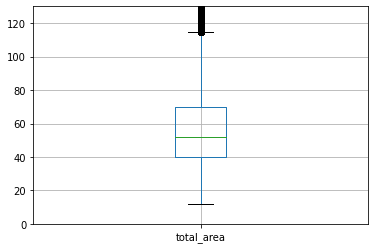

<AxesSubplot:ylabel='Frequency'>

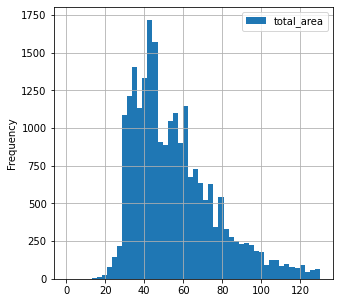

In [5]:
data.boxplot(column='total_area')
plt.ylim(0,130)
plt.show()
data.plot(y = 'total_area', kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,130))









Благодаря боксплоту, находим интерсующие нас границы и по ним строим более детальный график, основная масса квартир 38-46 метров, это большие однушки или небольшие двушки, все логично

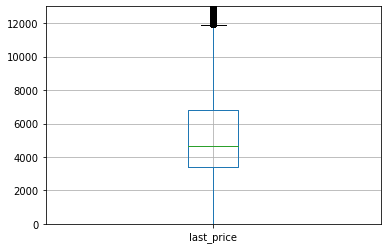

<AxesSubplot:ylabel='Frequency'>

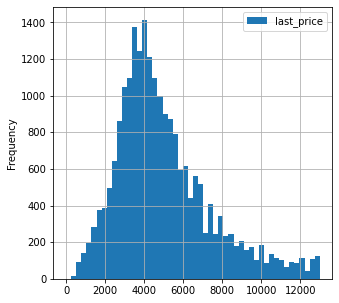

In [38]:

data.boxplot(column='last_price')
plt.ylim(0,13000)
plt.show()
data.plot(y = 'last_price', kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,13000))


Основная масса объектов стоит в пределах от 3 до 5 млн рублей

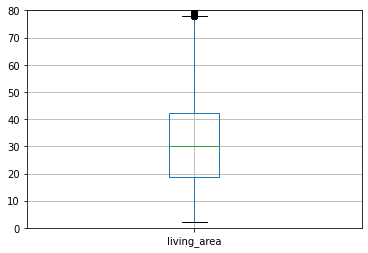

<AxesSubplot:ylabel='Frequency'>

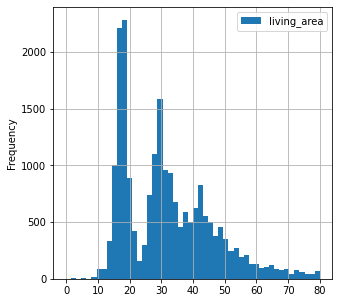

In [6]:
data.boxplot(column='living_area')
plt.ylim(0,80)
plt.show()
data.plot(y = 'living_area', kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,80))






Жилая площадь имеет две группы скопления значений и небольшую третью - логично, сколько комнат, столько и жилой площади, пропуски между нами отражают отношение жилой площади к общей(в любой квартире есть кухня и санузел)

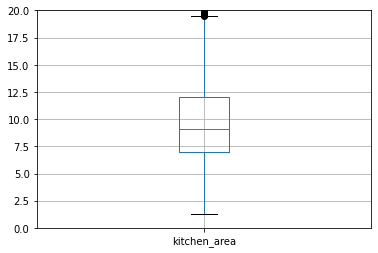

<AxesSubplot:ylabel='Frequency'>

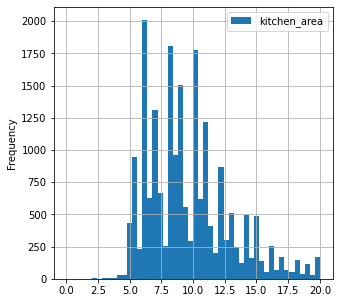

In [43]:
data.boxplot(column='kitchen_area')
plt.ylim(0,20)
plt.show()

data.plot(y = 'kitchen_area', kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,20))

Здесь все нормально, кухня как правило везде одна и разного размера

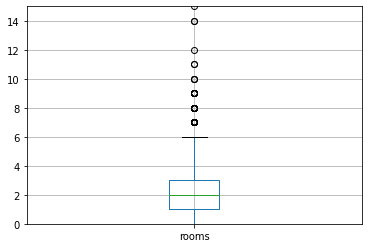

<AxesSubplot:ylabel='Frequency'>

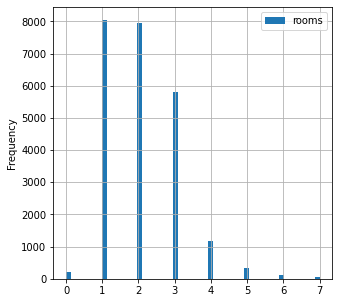

In [7]:
data.boxplot(column='rooms')
plt.ylim(0,15)
plt.show()

data.plot(y = 'rooms', kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,7))

График можно было и не стриоть, но благодаря нему мы понимаем, что больше всего 1 и 2 комн квартир

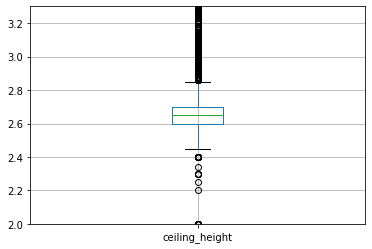

<AxesSubplot:ylabel='Frequency'>

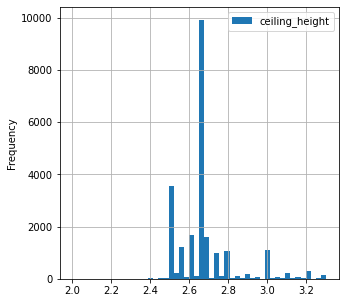

In [8]:

data.boxplot(column='ceiling_height')
plt.ylim(2,3.3)
plt.show()

data.plot(y = 'ceiling_height', kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (2,3.3))


Потолки как правило везде стандартные, не удивительно

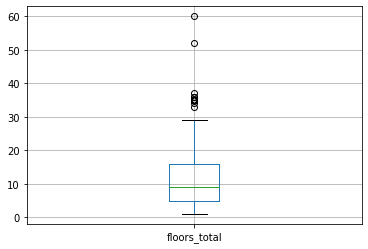

<AxesSubplot:ylabel='Frequency'>

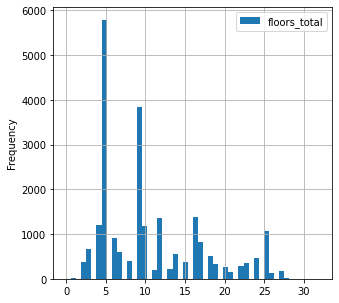

In [51]:

data.boxplot(column='floors_total')
plt.show()

data.plot(y = 'floors_total', kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,32))


In [ ]:
Советские серийный дома в 5 и 9 этажей, Лен область не исключение

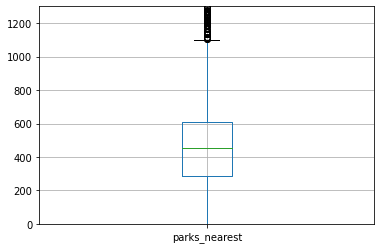

<AxesSubplot:ylabel='Frequency'>

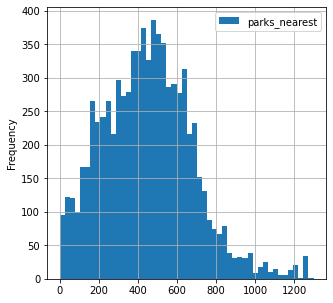

In [54]:
data.boxplot(column='parks_nearest')
plt.ylim(0,1300)
plt.show()

data.plot(y = 'parks_nearest', kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,1300))

In [ ]:
Градостроительство работает! у Большиснтва квартир есть парк в пешей доступности

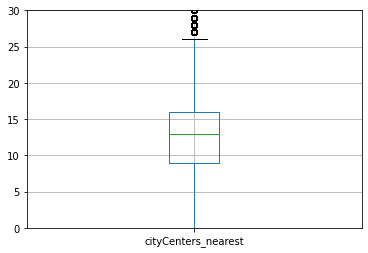

<AxesSubplot:ylabel='Frequency'>

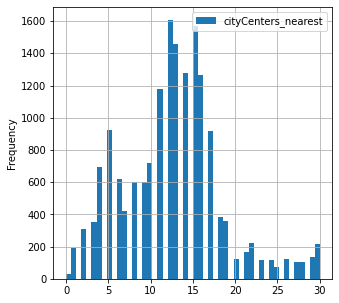

In [57]:
data.boxplot(column='cityCenters_nearest')
plt.ylim(0,30)
plt.show()

data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,30))

данные нормальные, основная масса квартир находистяв диапазоне, 10-18 км от центра

<AxesSubplot:>

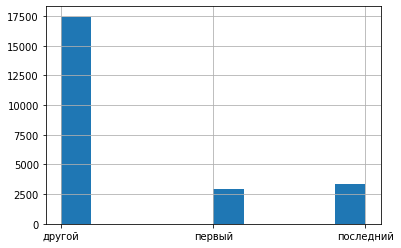

In [10]:
data['level'].hist()

Квартир на первом и последнем этаже сильно меньше чем на любом другом, а на последнме этаже немного больше чем на первом, это обуславливается тем, что на первом этаже часто распологается торговая площадь

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Супер!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Так-то лучше! Но на забывай текст помещать в ячейках с типом markdown

,total_images,last_price,total_area,metr2_cost,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,month,day,level
0,20,13000.0,108.00,120.0,2019-03-07,3,2.70,16.0,51.0,8,...,16.0,1.0,482.0,2.0,755.0,NaN,2019,3,4,другой
1,7,3350.0,40.40,83.0,2018-12-04,1,2.65,11.0,18.6,1,...,19.0,0.0,NaN,0.0,NaN,81.0,2018,12,2,первый
2,10,5196.0,56.00,93.0,2015-08-20,2,2.65,5.0,34.3,4,...,14.0,1.0,90.0,2.0,574.0,558.0,2015,8,4,другой
3,0,64900.0,159.00,408.0,2015-07-24,3,2.65,14.0,NaN,9,...,7.0,2.0,84.0,3.0,234.0,424.0,2015,7,5,другой
4,2,10000.0,100.00,100.0,2018-06-19,2,3.03,14.0,32.0,13,...,8.0,2.0,112.0,1.0,48.0,121.0,2018,6,2,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700.0,133.81,72.0,2017-03-21,3,3.70,5.0,73.3,3,...,4.0,1.0,796.0,3.0,381.0,NaN,2017,3,2,другой
23695,14,3100.0,59.00,53.0,2018-01-15,3,2.65,5.0,38.0,4,...,NaN,NaN,NaN,NaN,NaN,45.0,2018,1,1,другой
23696,18,2500.0,56.70,44.0,2018-02-11,2,2.65,3.0,29.7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2018,2,7,первый
23697,13,11475.0,76.75,150.0,2017-03-28,2,3.00,17.0,NaN,12,...,10.0,2.0,173.0,3.0,196.0,602.0,2017,3,2,другой


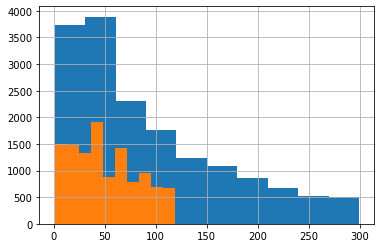

In [5]:
data.query('days_exposition < 300')['days_exposition'].hist()
data.query('days_exposition < 120')['days_exposition'].hist()
data['days_exposition'].median()
data['days_exposition'].mean()
data

Квартиры продавались быстрее всего в первые от 0 до 60 дней, мы указали значение в 300 дней, чтобы определить более точные диапазоны. медиана по дням равняется 95. На более дательной гистограмме мы получаем следующее - больше всего квартиры продавались в диапазоне 40-50 дней. Определим следующие границы по срокам сделки - 0-50 дней считается быстрой продажей, 50-10 дней - средний цикл сделки, более 100 дней - долгий. Среднее значнеие в 180 дней никак не отражает общую картину

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Отлично! Для определения быстрых и долгих продаж советую опираться на квартили

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='day', ylabel='last_price'>,
        <AxesSubplot:xlabel='month', ylabel='last_price'>,
        <AxesSubplot:xlabel='year', ylabel='last_price'>,
        <AxesSubplot:xlabel='floor', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='day', ylabel='total_area'>,
        <AxesSubplot:xlabel='month', ylabel='total_area'>,
        <AxesSubplot:xlabel='year', ylabel='total_area'>,
        <AxesSubplot:xlabel='floor', ylabel='total_area'>],
       [<AxesS

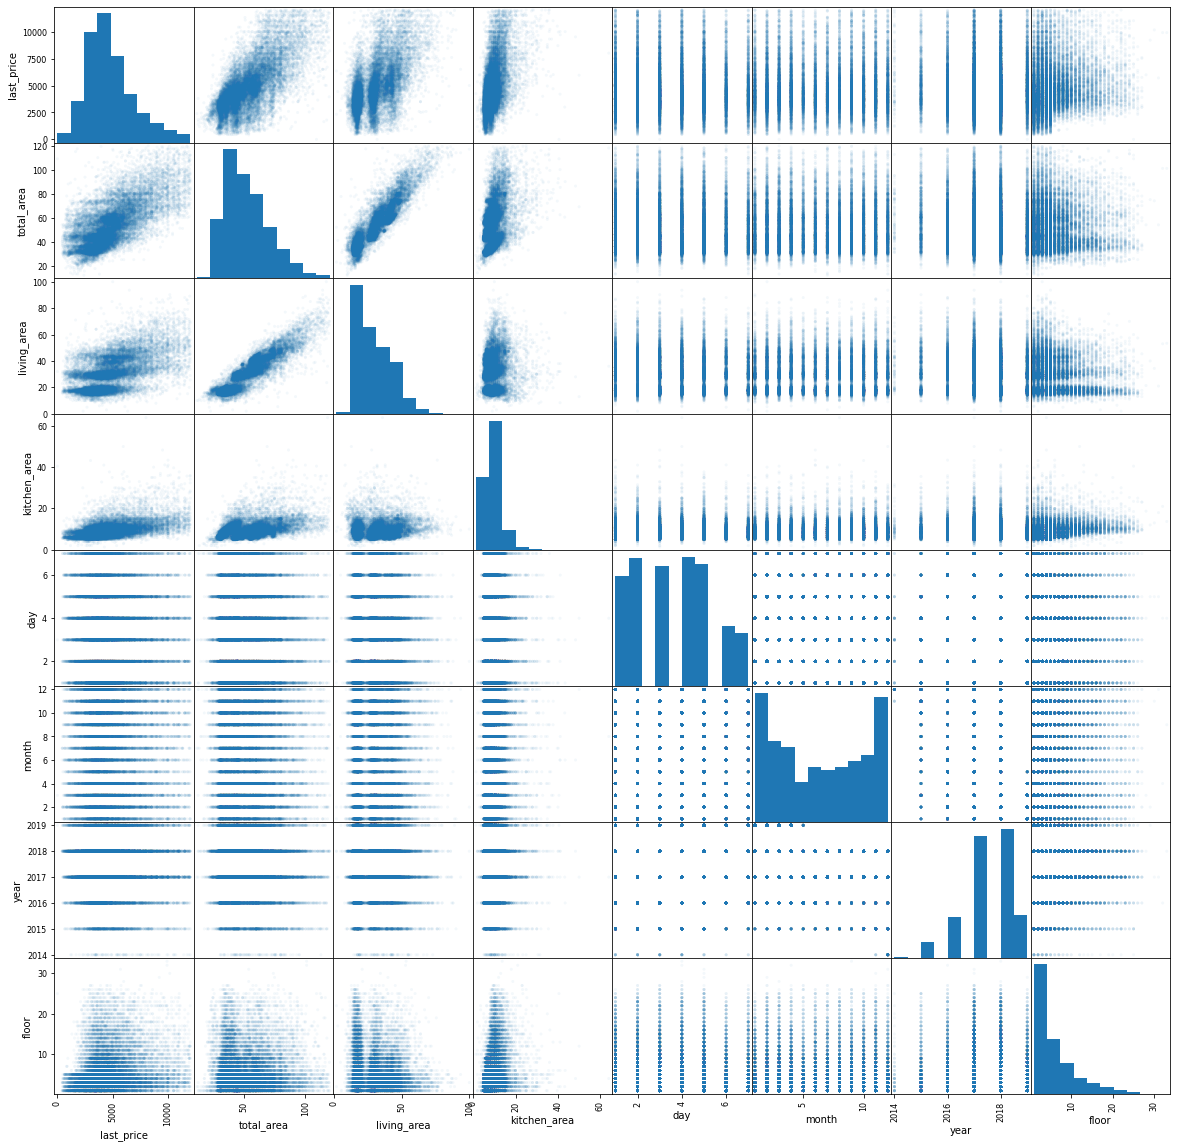

In [6]:




data_sorted = data[data['last_price'] < 12000]
data_sorted = data_sorted[data_sorted['total_area'] < 120]
data_sorted = data_sorted[data_sorted['rooms'] < 7]
data_sorted = data_sorted[data_sorted['ceiling_height'] < 3.5]


data_sorted[['total_area','last_price','rooms','ceiling_height','floor','kitchen_area','living_area','cityCenters_nearest','parks_nearest']].describe()

data_sorted_for_price = data_sorted[[
    'last_price',
    'total_area',
    'living_area',
    'kitchen_area',
    'day',
    'month',
    'year',
    'level',
    'floor'
]]

pd.plotting.scatter_matrix(data_sorted_for_price, figsize=(20, 20), alpha=0.05)


Цена зависит от общей площади равномерно до определноого момента, понятно что чем больше метраж и количество комнат, тем дешевле квадратура, но когда площадь квартиры становится заметно выше среднего, уже сильное влияет оказывают ряд других факторов.
С жилой площадью все немного иначе, есть четкий разрыв между двумя группами распределний, логичнр предлложить, что это разное количество комнат, и видно что больше всего 2комн квартир. 
Более распротранены квартиры на первых этажах, так как и невысотных домов больше, особенно в области


In [7]:
data_sorted.corr()

,total_images,last_price,total_area,metr2_cost,rooms,ceiling_height,floors_total,living_area,floor,studio,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,month,day
total_images,1.000000,0.163758,0.107292,0.119347,0.082870,0.017144,0.011380,0.091581,0.030002,-0.028163,...,-0.006330,-0.034132,0.002252,-0.012200,-0.023827,0.000976,-0.034929,0.147956,0.005773,-0.007436
last_price,0.163758,1.000000,0.697028,0.627506,0.435910,0.359081,0.205810,0.568169,0.141676,-0.070048,...,-0.036332,-0.340104,0.105801,0.051958,0.138429,-0.047531,0.075072,0.004516,0.004900,-0.013133
total_area,0.107292,0.697028,1.000000,-0.076711,0.804636,0.259371,-0.025063,0.908477,-0.030584,-0.118552,...,-0.022730,-0.121081,0.050423,0.008780,0.088857,-0.026359,0.110043,-0.058410,0.007668,-0.007321
metr2_cost,0.119347,0.627506,-0.076711,1.000000,-0.230746,0.221469,0.345103,-0.169555,0.251310,0.047413,...,-0.037457,-0.394834,0.090158,0.073448,0.089873,-0.037116,-0.015468,0.071502,-0.002784,-0.010317
rooms,0.082870,0.435910,0.804636,-0.230746,1.000000,0.070887,-0.234148,0.892996,-0.177406,-0.171133,...,-0.047126,-0.071545,0.051522,-0.045734,0.020811,-0.005202,0.082349,-0.033872,-0.002354,-0.000455
ceiling_height,0.017144,0.359081,0.259371,0.221469,0.070887,1.000000,0.017557,0.193428,0.010319,0.020443,...,-0.071384,-0.233071,0.151868,-0.054916,0.142358,-0.067212,0.068163,-0.044784,-0.003179,-0.012751
floors_total,0.011380,0.205810,-0.025063,0.345103,-0.234148,0.017557,1.000000,-0.182062,0.670790,0.072474,...,0.094419,-0.031361,-0.234924,0.107329,-0.094550,0.019834,-0.042455,-0.000369,0.014745,0.010792
living_area,0.091581,0.568169,0.908477,-0.169555,0.892996,0.193428,-0.182062,1.000000,-0.141439,-0.076768,...,-0.051210,-0.109899,0.077984,-0.036735,0.058989,-0.010819,0.098704,-0.047270,-0.000741,-0.000285
floor,0.030002,0.141676,-0.030584,0.251310,-0.177406,0.010319,0.670790,-0.141439,1.000000,0.039614,...,0.063875,-0.013767,-0.154357,0.078339,-0.060467,0.020029,-0.038803,0.002380,0.018864,0.010416
studio,-0.028163,-0.070048,-0.118552,0.047413,-0.171133,0.020443,0.072474,-0.076768,0.039614,1.000000,...,-0.023303,-0.013309,-0.030927,0.013389,0.004382,-0.002926,-0.021723,0.011379,-0.000341,-0.001947


<AxesSubplot:xlabel='day'>

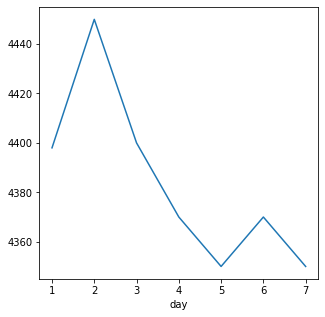

In [8]:
data_sorted.groupby('day')['last_price'].median().plot(figsize=(5, 5))


В будние дни картина схода, а вот в выходные дни ситуация ухудшается

<AxesSubplot:xlabel='month'>

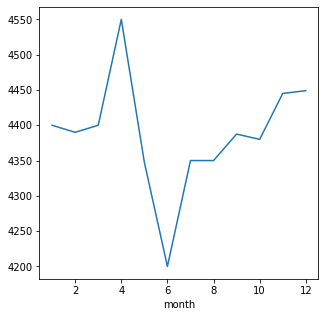

In [9]:
data_sorted.groupby('month')['last_price'].median().plot(figsize=(5, 5))


Пик спроса приходится на апрель, самый непродаваемый месяц - июнь

<AxesSubplot:xlabel='year'>

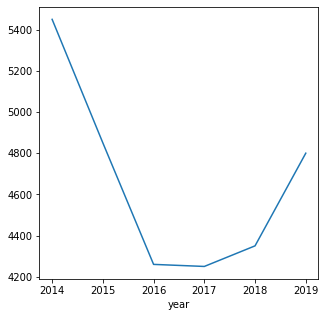

In [10]:
data_sorted.groupby('year')['last_price'].median().plot(figsize=(5, 5))


Всплеск покупок квартир был в 2014 году, тогда был кризис и рубль ослаб, люди искали спасение сбережениям в недвижимости, далее почти 5 лет на рынке было относительное затишье, и с 2019 при улучшении экономической ситуации населения - покупки пошли в гору

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> По зависимостям все отлично. Молодец!

In [62]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'metr2_cost', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table
print(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()])
print(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()])
                


                 count      mean
locality_name                   
Санкт-Петербург  15721  114.8502
               count       mean
locality_name                  
Выборг           237  58.097046


из топ-10 Самая большая стоимость жилья в Санкт-петербурге, самая низкая - в Выборге

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Исправлено)

Квартиры продавались быстрее всего в первые от 0 до 60 дней, мы указали значение в 300 дней, чтобы определить более точные диапазоны. медиана по дням равняется 95. На более дательной гистограмме мы получаем следующее - больше всего квартиры продавались в диапазоне 40-50 дней. Определим следующие границы по срокам сделки - 0-50 дней считается быстрой продажей, 50-10 дней - средний цикл сделки, более 100 дней - долгий. Среднее значнеие в 180 дней никак не отражает общую картрну

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Похоже вывод дублируется

,metr2_cost
cityCenters_nearest,
0,245.888889
1,177.010417
2,157.854839
3,121.368571
4,133.289244
5,140.504348
6,151.012945
7,156.173810
8,125.688442


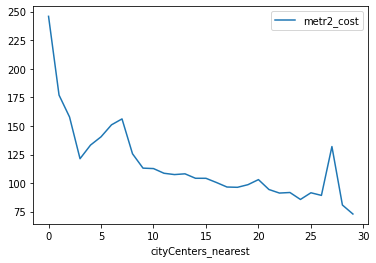

In [12]:

data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(999999)
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest !=999999').pivot_table(index = 'cityCenters_nearest', values = 'metr2_cost', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

Чем дальше квартира от центра - тем она дешевле, достаточно логично

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Логично) 

### Общий вывод

Была проделана достаточно глубокая работа над данными, трудоемкая. Могу отметить следующее:
1)Достаточно много данных пропущено и не все их можно и нужно восстанавливать, напрмиер колчиество балконов невозможно никак посчитаь в пропущенных значениях,для человека логично что если балкона, то не нужно писать никакую цифру, в том числе 0. То же самое касасется и площади кухни и жилой зоны, возможно вообще квартира-студия и поэтому не указывается площадь кухни.

Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах. следующим шагом мы изучили время продажи квартир - большое количество объявлений было автоматически снято с Яндекс Недвижимость и дату из снятия нельзя считать датой продажи квартиры, поэтому, изучая средние сроки продажи квартир - данные значения не учитывались. Была выявлены самые частые сроки оборачиваемости недвижмости - 40-50 дней. Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру.

подробнее расписал в каждом пункте, также могу добавить что в Санкт-Петербурге самая дорогая недвижимость, а в Выборге самая дешевая

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Вывод отражает проделанную работу!

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v2**:
Борис, исправим оставшиеся замечания и проект будет зачтен.

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v3**:
Борис,  ошибки исправлены, проект принят, поздравляю тебя! Успешной учебы и еще увидимся в Практикуме!